<a href="https://colab.research.google.com/github/jarapha/TalentoTech/blob/main/01_Lab_JairoR_Tapias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Laboratorio No. 1 - Jairo Rafael Tapias Henao - Talento Tech
Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos


# 1. El problema del negocio
Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# 2. El set de datos
La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "Edad": edad (numérica)
2. "trabajo": tipo de trabajo (categórica: "admin.", "unknown",  "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "estado_civil": estado civil (categórica: "married", "divorced", "single")
4. "educacion": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "morosidad": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "saldo": saldo promedio anual de ingresos en euros (numérica)
7. "vivienda": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "prestamo": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contacto": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "dia": último día del mes en el que fue contactada (numérica)
11. "mes": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duracion": duración (en segundos) del último contacto (numérica)
13. "campaña": número total de veces que fue contactada durante la campaña (numérica)
14. "dias_previos": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "anterior": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "resultado": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "respuesta": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# 3. Una primera mirada al dataset

In [41]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import profiling -> Librería para limpiado y análisis
#pip install sweetviz -> Librería para análisis

In [42]:
# Lectura de los datos a partir del archivo dataset_banco.csv y creación de la estructura de datos
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/dataset_banco.csv"
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Impresión de la estructura de datos para un primer acercamiento a su composición
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0         1   -1.0         0  unknown  no  
1  unknown    5   may     151.0         1   -1.0         0  unknown  no  
2  unknown    5   may      76.0         1   -1.0         0  unknown  no  
3  unknown    5   may      92.0         1   -1.0         0  unknown  no  
4  unknown    5   may     198.0         1   -1.0         0  unknown  no  


In [44]:
# Impresión de la estructura de datos para analizar su composición a través de su información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB
None


In [45]:
# Cambio de los atributos a español para un entendimiento mas cercano e impresión de los cambios
df.columns = ['edad',
              'trabajo',
              'estado_civil',
              'educacion',
              'morosidad',
              'saldo',
              'vivienda',
              'prestamo',
              'contacto',
              'dia',
              'mes',
              'duracion',
              'campaña',
              'dias_previos',
              'anterior',
              'resultado',
              'respuesta']

print(df.columns)
print(df.head())

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'morosidad', 'saldo',
       'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion', 'campaña',
       'dias_previos', 'anterior', 'resultado', 'respuesta'],
      dtype='object')
   edad       trabajo estado_civil  educacion morosidad   saldo vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  prestamo contacto  dia  mes  duracion  campaña  dias_previos  anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0  

**Visualiza las variables categóricas y las numéricas**

In [46]:
#Crea una copia de la estructura de datos para porder hacer comparaciones
DataFrame_Banco = df.copy()

In [47]:
#Clasificar columnas en categoricas y numéricas
categoricas = DataFrame_Banco.select_dtypes(include=['object']).columns.tolist()
numericas = DataFrame_Banco.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']


In [48]:
#Explora las columnas categóricas y analizar sus atributos
pd.Series.value_counts(DataFrame_Banco['trabajo'])

,count
trabajo,
blue-collar,9731
management,9455
technician,7599
admin.,5168
services,4153
retired,2263
self-employed,1578
entrepreneur,1487
unemployed,1303


# 4. Limpieza
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

Datos faltantes en algunas celdas
Columnas irrelevantes (que no responden al problema que queremos resolver)
Registros (filas) repetidos
Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
Errores tipográficos en el caso de las variables categóricas
Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

# 4.1 Datos faltantes
Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "trabajo", "estado_civil", "educacion", "balance", "duracion" y "dias_previos".

Por ser tan pocos los datos faltantes optaremos por eliminar las filas correspondientes:

In [49]:
#Comando para contar los valores faltantes de mi dataframe
DataFrame_Banco.isna().sum()

,0
edad,0
trabajo,2
estado_civil,1
educacion,1
morosidad,0
saldo,2
vivienda,0
prestamo,0
contacto,0
dia,0


In [50]:
#Elimino los valores faltantes de mi estructura de datos
DataFrame_Banco.dropna(inplace=True)

#Cuento los valores por columna de mi estructura de datos
DataFrame_Banco.count()

,0
edad,45207
trabajo,45207
estado_civil,45207
educacion,45207
morosidad,45207
saldo,45207
vivienda,45207
prestamo,45207
contacto,45207
dia,45207


# 4.2 Columnas irrelevantes
Una columna irrelevante puede ser:

*   **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
*   **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
* **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
*   **Columnas con información redundante**. Por ejemplo si además de las columnas "mes" y "dia" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

# for col in cols_cat:
Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables: {col}: Representa el nombre de la columna actual en la iteración del bucle. {data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna

In [51]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']

for col in cols_cat:
  print(f'Columna {col}: {DataFrame_Banco[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna morosidad: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado: 6 subniveles
Columna respuesta: 2 subniveles


# 4.3 Filas repetidas

In [52]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {DataFrame_Banco.shape}')
DataFrame_Banco.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {DataFrame_Banco.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


# 4.4 Outliers en las variables numéricas
No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

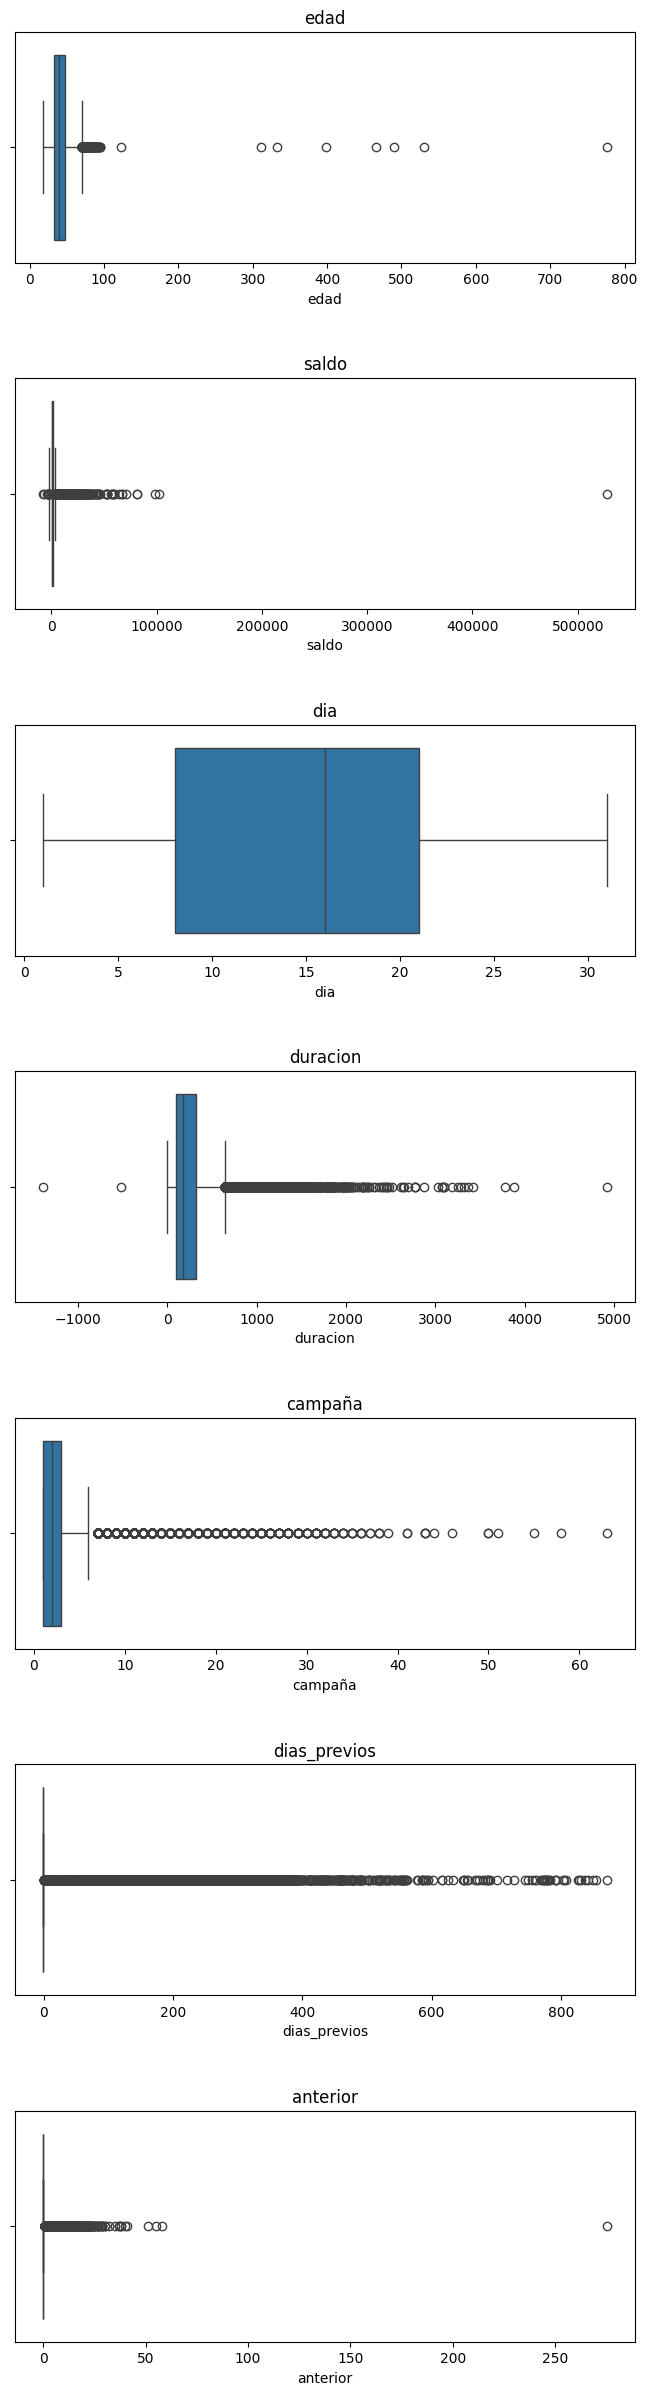

In [53]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña',
            'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

**Observaciones**:

* "edad": hay sujetos con edades mucho mayores a 100 años
* "duracion": hay valores negativos
* "anterior": hay un valor extremadamente alto (cercano a 300)

In [54]:
# Eliminar filas con "edad">100
print(f'Tamaño del set antes de eliminar registros de edad: {DataFrame_Banco.shape}')
DataFrame_Banco = DataFrame_Banco.drop(DataFrame_Banco[DataFrame_Banco['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {DataFrame_Banco.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [55]:
# Eliminar filas con "duracion"<0
print(f'Tamaño del set antes de eliminar registros de duración: {DataFrame_Banco.shape}')
DataFrame_Banco = DataFrame_Banco.drop(DataFrame_Banco[DataFrame_Banco['duracion'] < 0].index)
#data = data[data['duracion']>0]
print(f'Tamaño del set después de eliminar registros de duración: {DataFrame_Banco.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45193, 17)


# 4.5 Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

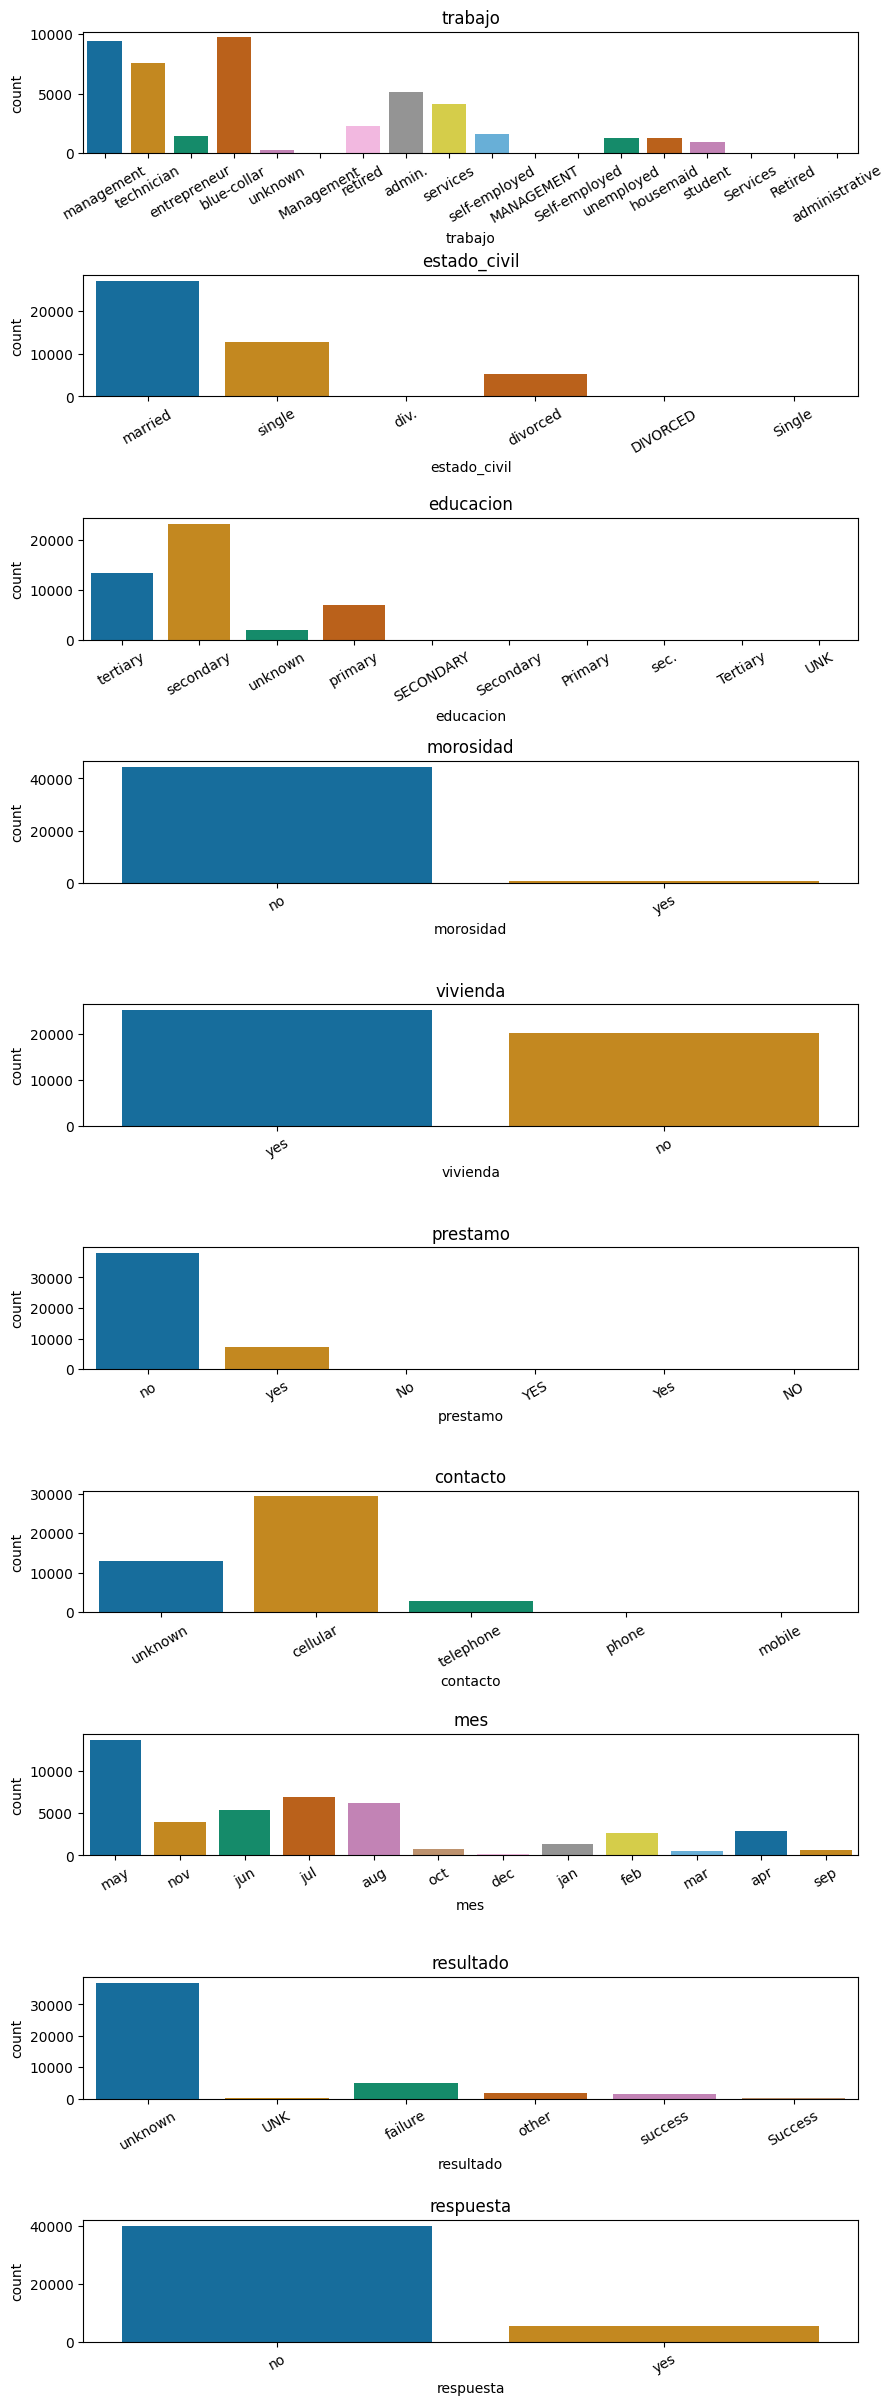

In [57]:
# Graficar los subniveles de cada variable categórica
cols_cat = [ 'trabajo','estado_civil', 'educacion', 'morosidad', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=DataFrame_Banco, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

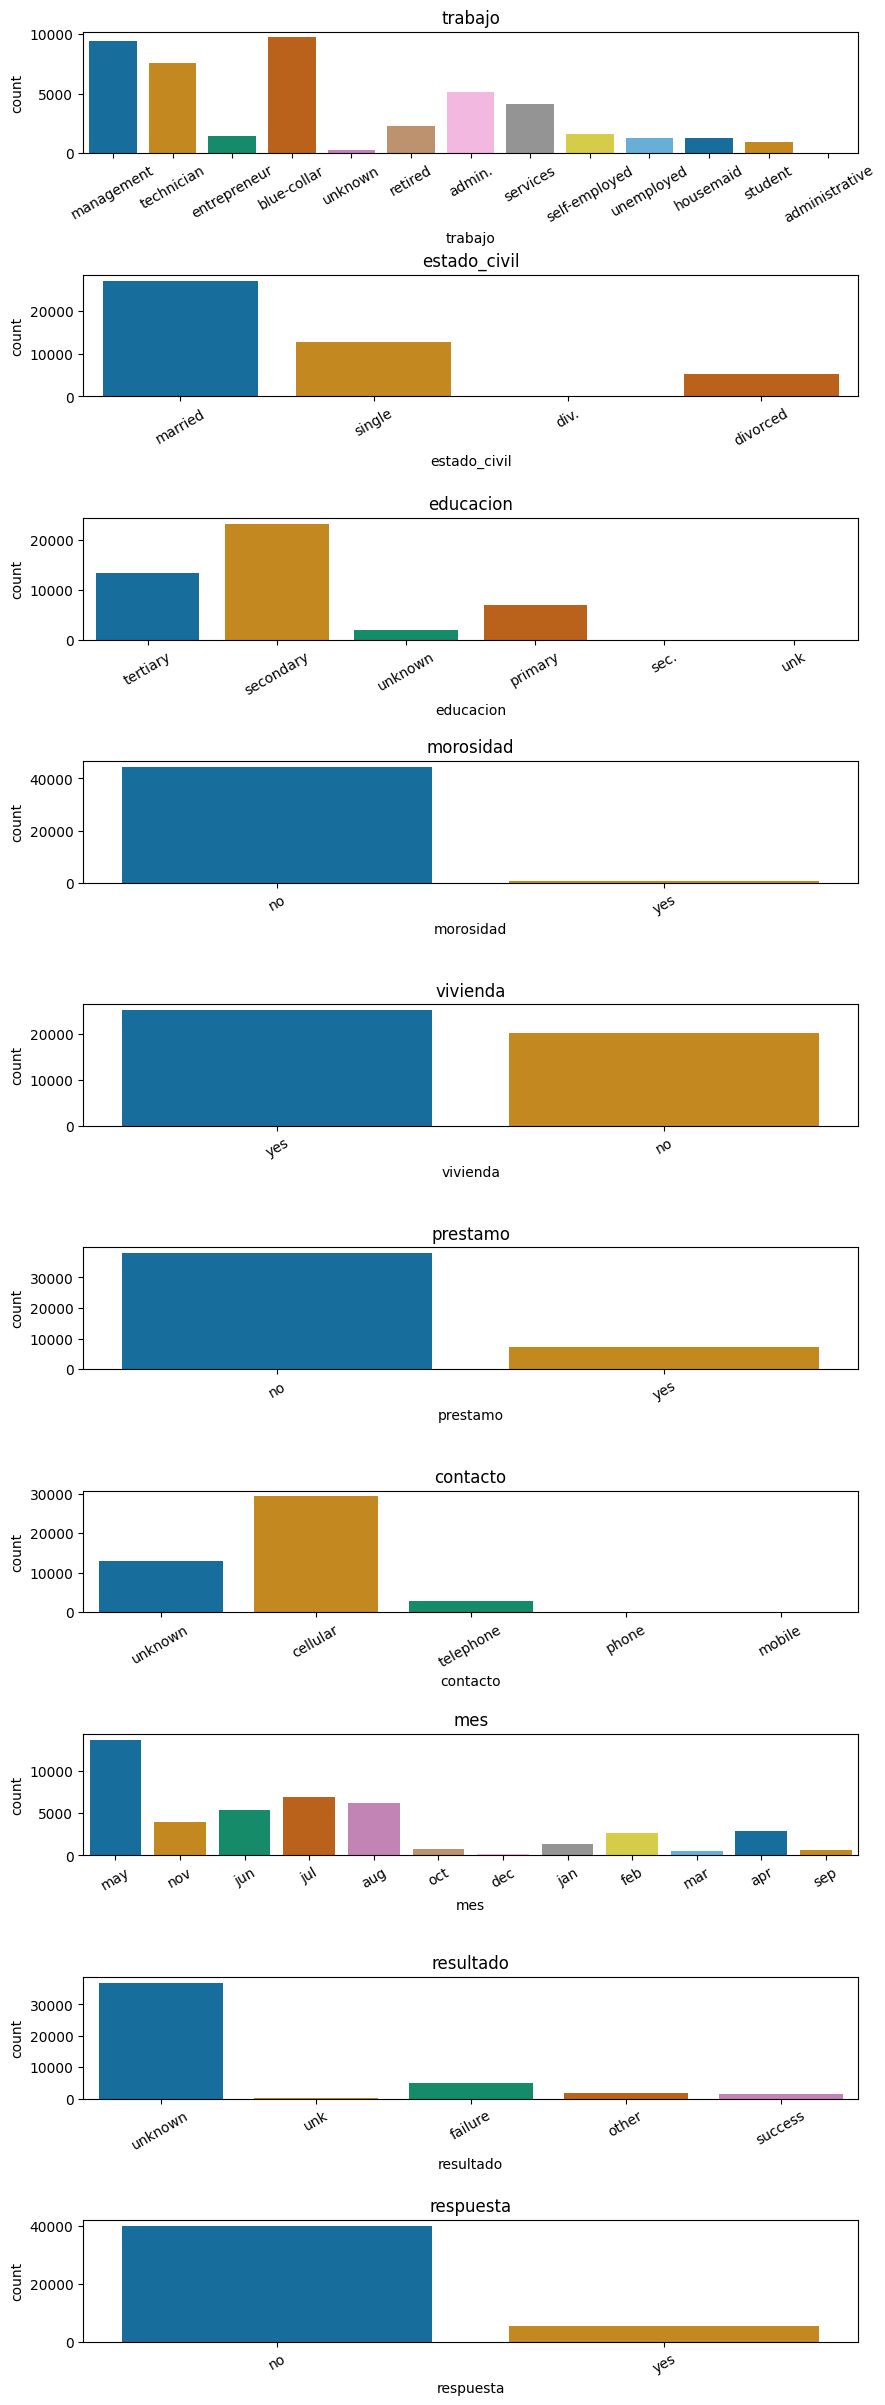

In [58]:
for column in DataFrame_Banco.columns:
#Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        DataFrame_Banco[column] = DataFrame_Banco[column].str.lower()

#generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=DataFrame_Banco, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [61]:
# Trabajo: unificar admin. y administrative
print(DataFrame_Banco['trabajo'].unique())
DataFrame_Banco['trabajo'] = DataFrame_Banco['trabajo'].str.replace('admin.','administrative', regex=False)
print(DataFrame_Banco['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [62]:
#Conteo los valores para la columna trabajo
pd.Series.value_counts(DataFrame_Banco['trabajo'])

,count
trabajo,
blue-collar,9727
management,9457
technician,7593
administrative,5168
services,4152
retired,2263
self-employed,1578
entrepreneur,1487
unemployed,1303


In [67]:
# Estado Civil: unificar div. y divorced
print(DataFrame_Banco['estado_civil'].unique())
DataFrame_Banco['estado_civil'] = DataFrame_Banco['estado_civil'].str.replace('div.','divorced', regex=False)
print(DataFrame_Banco['estado_civil'].unique())

['married' 'single' 'divorced']
['married' 'single' 'divorced']


In [68]:
#Conteo los valores para la columna estado_civil
pd.Series.value_counts(DataFrame_Banco['estado_civil'])

,count
estado_civil,
married,27204
single,12785
divorced,5204


In [70]:
#Educación: unificar sec. y secondary, unk y unknown
print(DataFrame_Banco['educacion'].unique())
DataFrame_Banco['educacion'] = DataFrame_Banco['educacion'].str.replace('sec.','secondary', regex=False)
DataFrame_Banco.loc[DataFrame_Banco['educacion']=='unk','educacion'] = 'unknown'
print(DataFrame_Banco['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary']
['tertiary' 'secondary' 'unknown' 'primary']


In [71]:
#Conteo los valores para la columna educacion
pd.Series.value_counts(DataFrame_Banco['educacion'])

,count
educacion,
secondary,23189
tertiary,13299
primary,6848
unknown,1857


In [73]:
# Contacto: unificar telephone y phone
print(DataFrame_Banco['contacto'].unique())
DataFrame_Banco.loc[DataFrame_Banco['contacto']=='phone','contacto'] = 'telephone'
DataFrame_Banco.loc[DataFrame_Banco['contacto']=='mobile','contacto'] = 'cellular'
print(DataFrame_Banco['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [74]:
#Conteo los valores para la columna contacto
pd.Series.value_counts(DataFrame_Banco['contacto'])

,count
contacto,
cellular,29277
unknown,13012
telephone,2904


In [76]:
# Resultado: unificar unk y unknown
print(DataFrame_Banco['resultado'].unique())
DataFrame_Banco.loc[DataFrame_Banco['resultado']=='unk','resultado']='unknown'
print(DataFrame_Banco['resultado'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [77]:
#Conteo los valores para la columna resultado
pd.Series.value_counts(DataFrame_Banco['resultado'])

,count
resultado,
unknown,36946
failure,4898
other,1838
success,1511


# 5. Medidas de Tendencia Central

Media

In [89]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = DataFrame_Banco['dias_previos'].mean()

print("Promedio de días de contacto:", media)

Promedio de días de contacto: 40.18106786449229


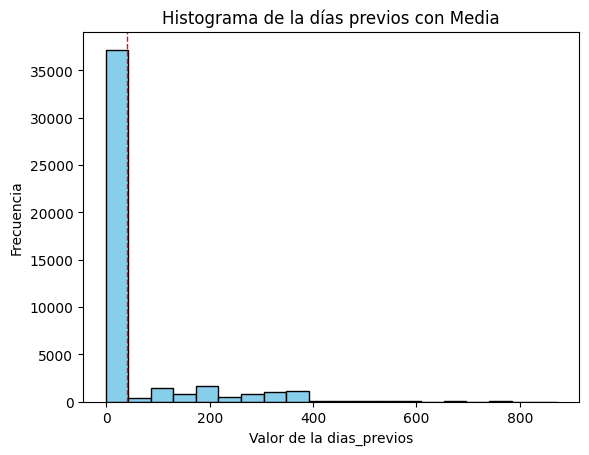

In [90]:
# Graficar un histograma del atributo "pdays"
plt.hist(DataFrame_Banco['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de la dias_previos')
plt.ylabel('Frecuencia')
plt.title('Histograma de la días previos con Media')

# Mostrar la gráfica
plt.show()

In [91]:
#Edad(age) promedio(mean) de los clientes interesados en adquirir un certificado de depósito(y)
edad_promedio_interesados = DataFrame_Banco[DataFrame_Banco['respuesta'] == 'yes']['edad'].mean()
print("1. Edad promedio de los clientes interesados:", edad_promedio_interesados)

1. Edad promedio de los clientes interesados: 41.665468306527906


Moda

In [95]:
#Edad(age) mas frecuente(mode) de los clientes interesados en adquirir un certificado de depósito(y)
edad_frecuente_interesados = DataFrame_Banco[DataFrame_Banco['respuesta'] == 'yes']['edad'].mode()
print("1. Edad mas frecuente de los clientes interesados:", edad_frecuente_interesados)

1. Edad mas frecuente de los clientes interesados: 0    32
Name: edad, dtype: int64


In [94]:
# Calcula la moda del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
moda = DataFrame_Banco['dias_previos'].mode()

print("la moda de días de contacto:", moda)

la moda de días de contacto: 0   -1.0
Name: dias_previos, dtype: float64


Desviación Estandar

In [84]:
# Calcular la desviación estándar para las columnas numéricas
desviaciones_estandar = DataFrame_Banco[['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']].std()

# Imprimir las desviaciones estándar
print(desviaciones_estandar)

edad              10.618324
saldo           3924.254214
dia                8.322770
duracion         257.347159
campaña            3.096987
dias_previos     100.108865
anterior           2.303556
dtype: float64


In [85]:
# Desviacion estandar para la variable 'dias_previos'
destd_dias_previos = df[['dias_previos']].std()

# Imprimir las desviaciones estándar
print(destd_dias_previos)

dias_previos    100.120622
dtype: float64


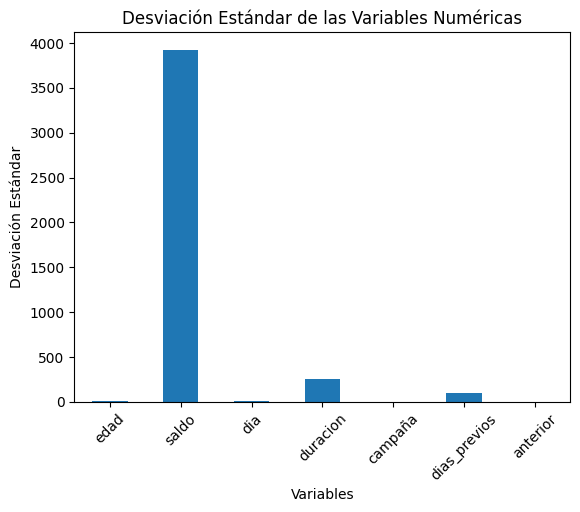

In [86]:
# Crear una gráfica de barras para representar las desviaciones estándar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

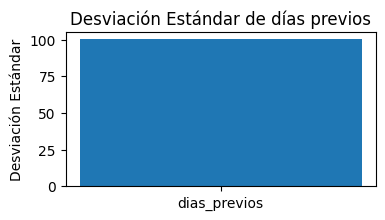

In [87]:
# Graficar la desviación estándar de 'dias_previos'
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias_previos', destd_dias_previos)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de días previos')
plt.ylabel('Desviación Estándar')
plt.show()

# 6. Guardado de la Estructura de Datos limpia

In [ ]:
#Script para guardar datos

import os
folder_path_destino = '/content/drive/MyDrive/Colab Notebooks/TalentoTech'

#Verificar si la carpeta existe, si no crearla
if not os.path.exists(folder_path_destino):
  os.makedirs(folder_path_destino)

#guardar el archivo CSV en la carpeta
file_path = os.path.join(folder_path_destino, 'data_banco_clean.csv')
path_origen.to_csv(file_path, index=False)

# 7. Análisis  de la Estructura de Datos

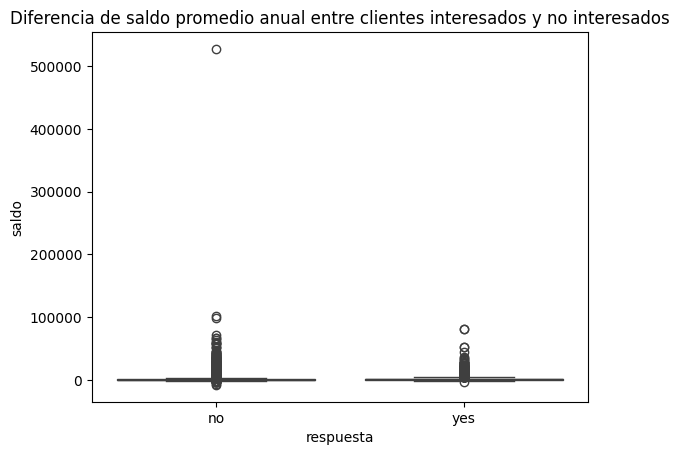

In [96]:
#Diferencia de ingresos entre clientes interesados y no interesados:
sns.boxplot(x='respuesta', y='saldo', data=DataFrame_Banco)
plt.title('Diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()

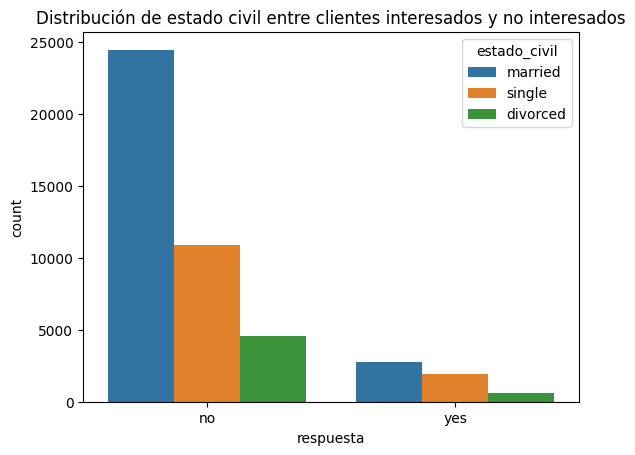

In [97]:
#Distribución de estado civil entre clientes interesados:
sns.countplot(x='respuesta', hue='estado_civil', data=DataFrame_Banco)
plt.title('Distribución de estado civil entre clientes interesados y no interesados')
plt.show()

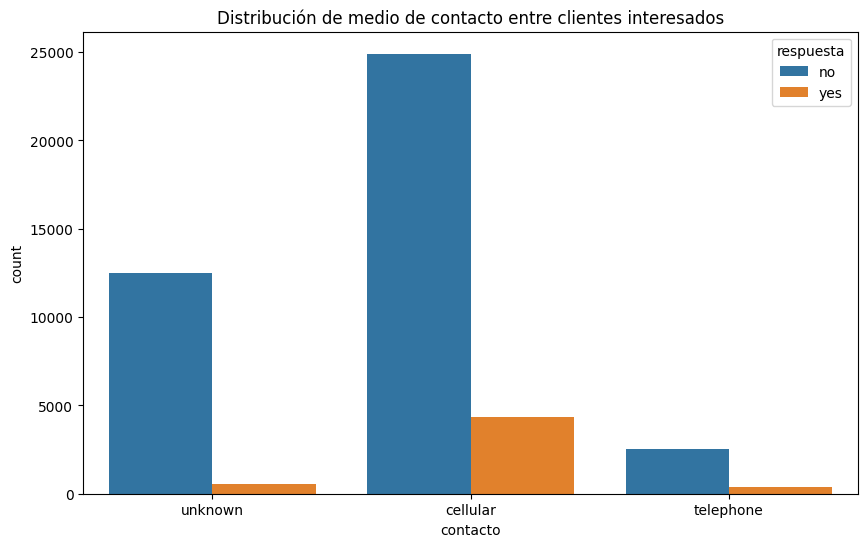

In [98]:
#Distribución medio de contacto de los clientes interesados:
plt.figure(figsize=(10, 6))
sns.countplot(x='contacto', hue='respuesta', data=DataFrame_Banco)
plt.title('Distribución de medio de contacto entre clientes interesados')
plt.show()

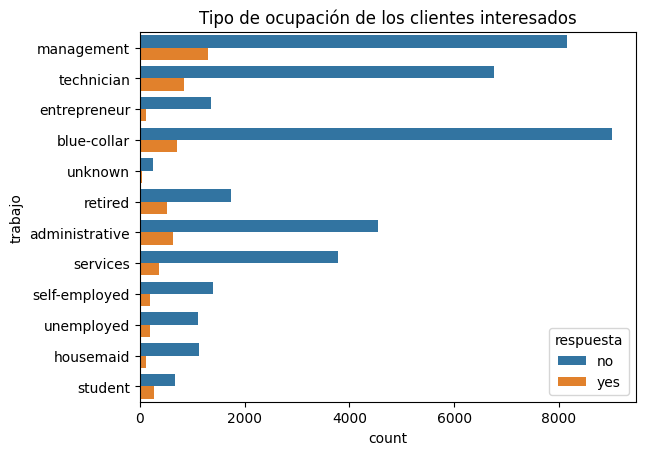

In [99]:
#Tipo de ocupación de los clientes interesados:
sns.countplot(y='trabajo', hue='respuesta', data=DataFrame_Banco)
plt.title('Tipo de ocupación de los clientes interesados')
plt.show()

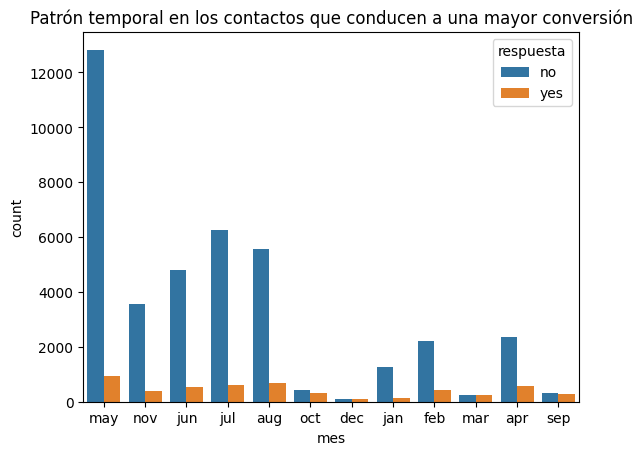

In [100]:
#Patrón temporal en los contactos que conducen a una mayor conversión de clientes:
sns.countplot(x='mes', hue='respuesta', data=DataFrame_Banco)
plt.title('Patrón temporal en los contactos que conducen a una mayor conversión')
plt.show()

# 8. Conclusiones